# SVD

## Introduction
Singular value decomposition is similar to eigen value decomposition in the sense that it yields orthonormal bases and values associated with the matrix at hand. It is more genral as it applies to rectangular matrices. For any matrix $A \in \mathbb{R}^{n \times m}$, it reads
$$A=U\Sigma V^T$$
where $U \in \mathbb{R}^{n \times n}$, $\Sigma$ is a diagonal matrix of the same size of A and $V \in \mathbb{R}^{m \times m}$, $\Sigma$. $U$ and $V$ are orthonormal matrices which columns are bases of the spaces associated with each dimension of A.

### SVD based approximation

By construction (see literature), SVD provides the best rank $k$ approximation of matrix A in the sense of $L^2$ norm. Indeed, the singular values $\sigma_i$ are sorted in a decreasing order i.e. $\forall j>i, \sigma_i>\sigma_j$. Then, we have
$$A\approx A_k = \sum_{i=0}^k \sigma_i u_i \otimes v_i$$

### SVD is related to EVD

Given the properties of the SVD, we can see that it is possible to solve an EVD problem that is equivalent to solve SVD. Indeed,
$$AA^T=U\Sigma V^T V \Sigma U^T =U\Sigma^2 U^T  $$ which means U and $\Sigma^2$ are the solution of the EVD of $AA^T$.

The same can be done with $A^TA=V\Sigma^2V^T$. Then one can take advantage of the size of the problem if $n >> m$ or the opposite. This also allows one to use the so called power iteration method to compute only the first few modes of the SVD.

### Computing SVD
There are multiple algorithms to cumpute SVD of both dense and sparse matrices. Most languages compatible with scientific computing (python, mathlab, C++, fotran,...) have highly efficient libraries to compute SVD on a single machine. Used well, they can use multi-core units and GPUs when available.

Alternatively, one will be able to use EVD solvers when the problem is suitable.

In case of very large matrices, one will have to use more advanced method to solve the problem. 

## Exercice

With the programming language of your choice (python/matlab recommended), solve the following exercice.

1. For a function that can be either $f(x,y)=xy$ or $f(x,y)=\sin(\sqrt{x^2+y^2})$, create a 50 by 200 sampling grid on the unit domain $[0,1]\times [0,1]$ and fill a matrix with the values. Then visualize the matrix using the software of your choice.

In [10]:
import numpy as np

In [41]:
# define f(x,y)=xy
def f(x,y):
    return sin(sqrt(x**2+y**2))
# define a grid with 50 points in x direction and 200 in y direction between [0 and 1]
x=np.linspace(0,1,50)
y=np.linspace(0,1,200)

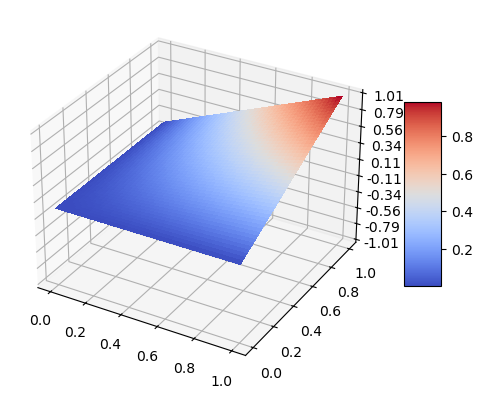

In [43]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
def f(x,y):
    return x*y
# define a grid with 50 points in x direction and 200 in y direction between [0 and 1]
x=np.linspace(0,1,50)
y=np.linspace(0,1,200)
X, Y = np.meshgrid(x, y)
A = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, A, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

2. Apply direct SVD from a computing library compatible with (or embedded in) your language. You will have to find out what's the basic computing library used, which algorithm is called and briefly describe its algorithm with pros and cons. 

In [45]:
U,Sigma,Vtranspose=np.linalg.svd(A)

In [49]:
Sigma

array([3.35450325e+01, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 3.35178061e-15, 3.35178061e-15, 3.35178061e-15,
       3.35178061e-15, 1.66705746e-17])

3. Compute approximation error (L2) defined as $E(A,A_k)=\frac{||A-A_k||_{L^2}}{||A||_{L^2}}$ with various truncation rank. 

4. Plot the error vs $k$ graph

5. Redo the exercice with a large image of your choice after converting it to grayscale. 

6. Add a timer to the SVD call and compare the algorithm based on EVD.